# Assignment No. - 6 : Logistic Regression

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE,SelectFromModel

In [27]:
bank_data=pd.read_csv("G:\\Assignments\\logistic regression\\bank-full.csv",sep = ";")
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [28]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [29]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [30]:
bank_data.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [32]:
bank_data.duplicated().sum()

0

In [33]:
bank_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [46]:
category_features = bank_data.select_dtypes(include=['object', 'bool']).columns.values
print('category_features  :' ,category_features ,'\n')

for column in category_features:
    print(column, " - ", len(bank_data[column].unique()) , "values:\n",bank_data[column].unique())

category_features  : ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'y'] 

job  -  12 values:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital  -  3 values:
 ['married' 'single' 'divorced']
education  -  4 values:
 ['tertiary' 'secondary' 'unknown' 'primary']
default  -  2 values:
 ['no' 'yes']
housing  -  2 values:
 ['yes' 'no']
loan  -  2 values:
 ['no' 'yes']
contact  -  3 values:
 ['unknown' 'cellular' 'telephone']
month  -  12 values:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome  -  4 values:
 ['unknown' 'failure' 'other' 'success']
y  -  2 values:
 ['no' 'yes']


In [47]:
for column in category_features:
    print(column,'\n======================')
    print(bank_data[column].value_counts(),'\n')

job 
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital 
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education 
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default 
no     44396
yes      815
Name: default, dtype: int64 

housing 
yes    25130
no     20081
Name: housing, dtype: int64 

loan 
no     37967
yes     7244
Name: loan, dtype: int64 

contact 
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

month 
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 

poutcome 
unknown

# Data Visualization

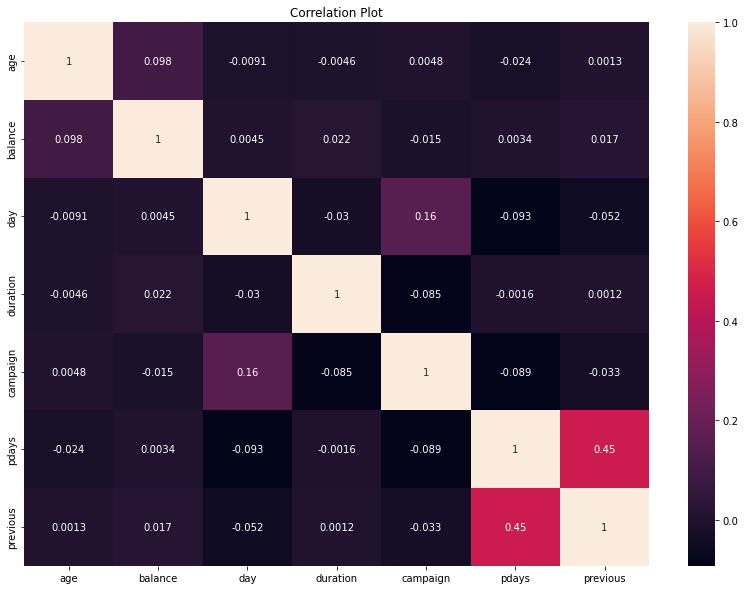

In [48]:
cor=bank_data.corr()
plt.figure(figsize=(14,10))
sns.heatmap(cor,annot=True)
plt.title('Correlation Plot')
plt.show()

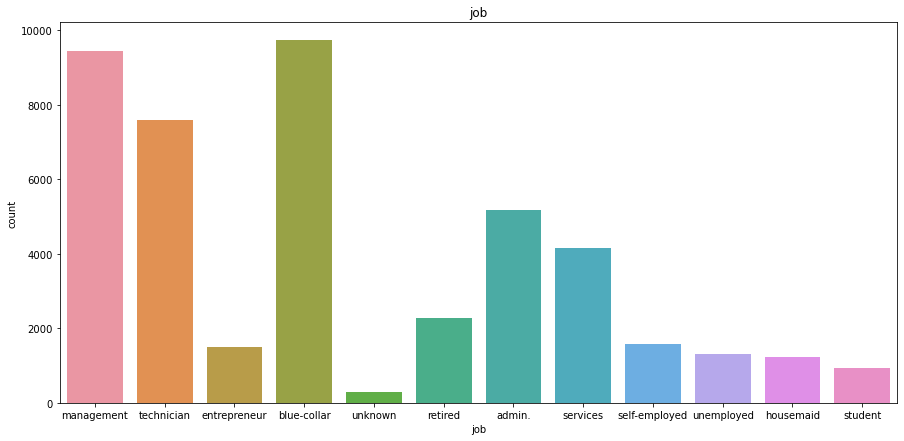

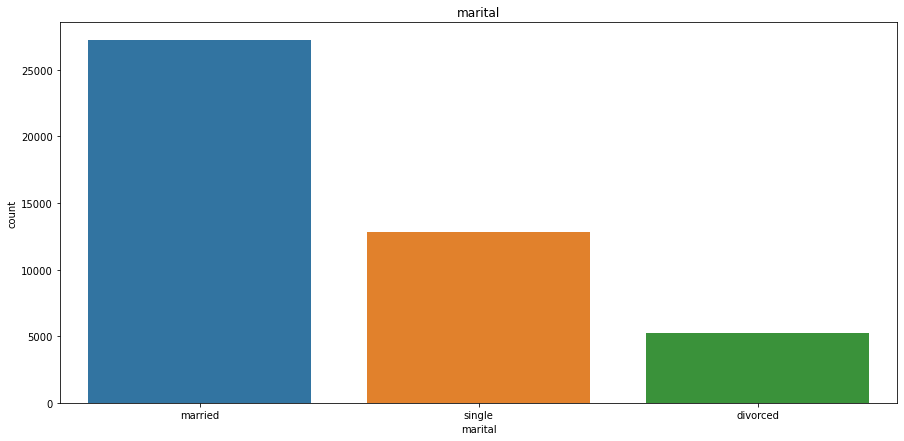

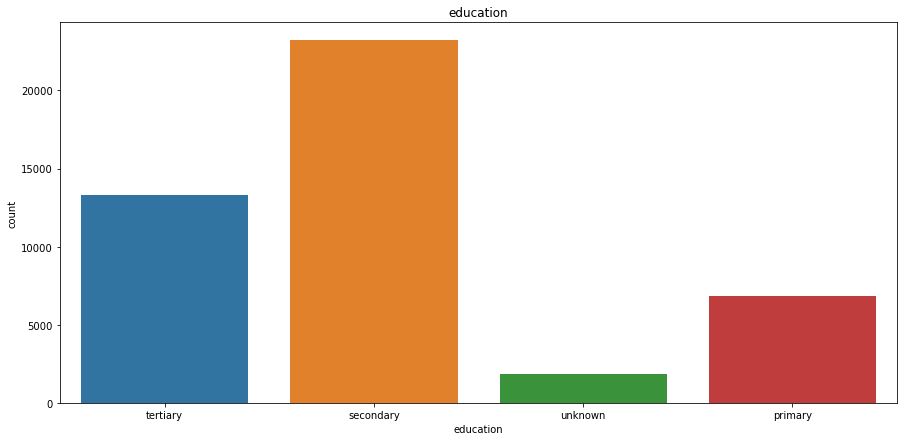

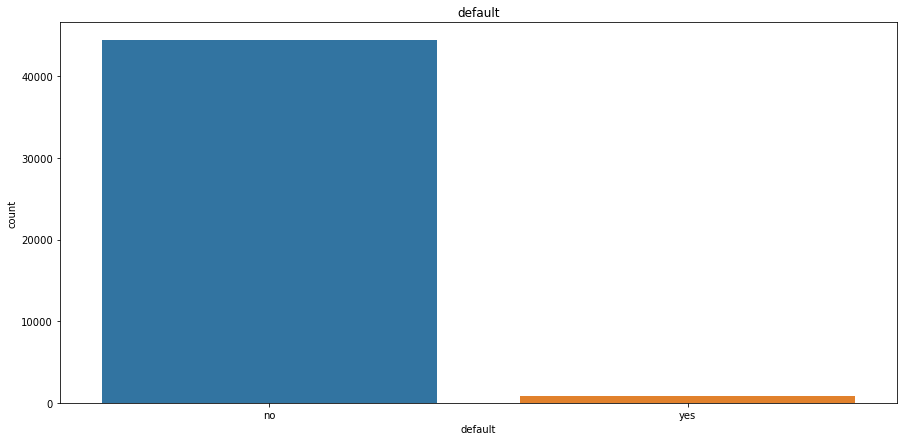

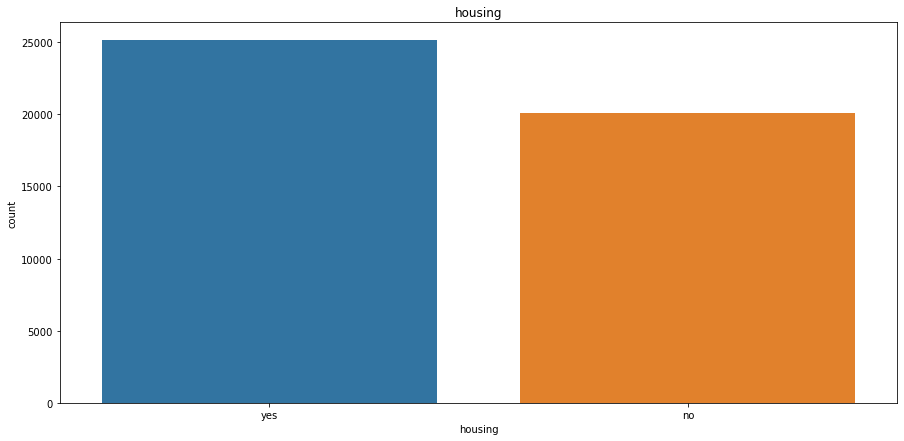

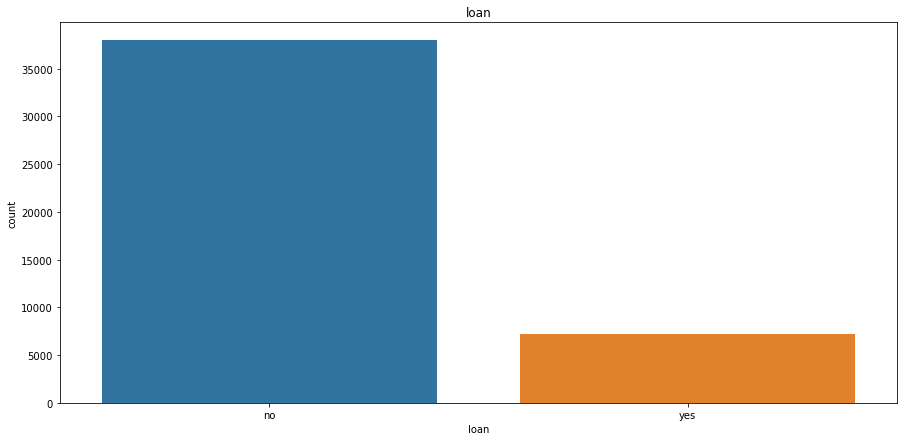

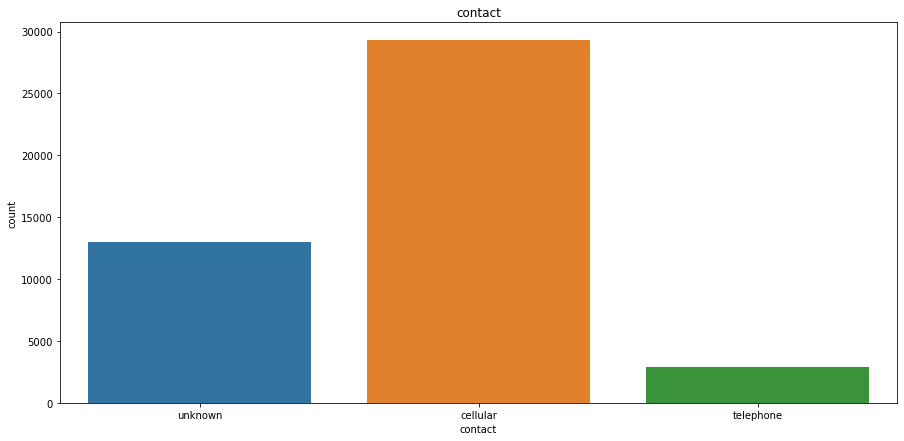

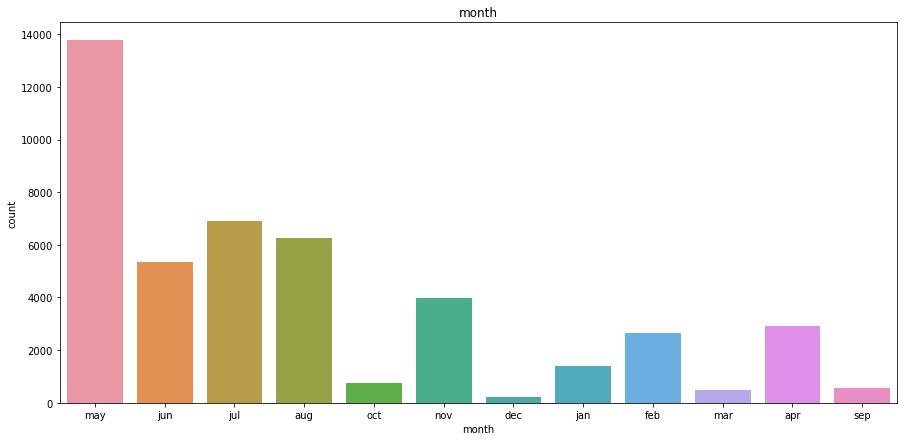

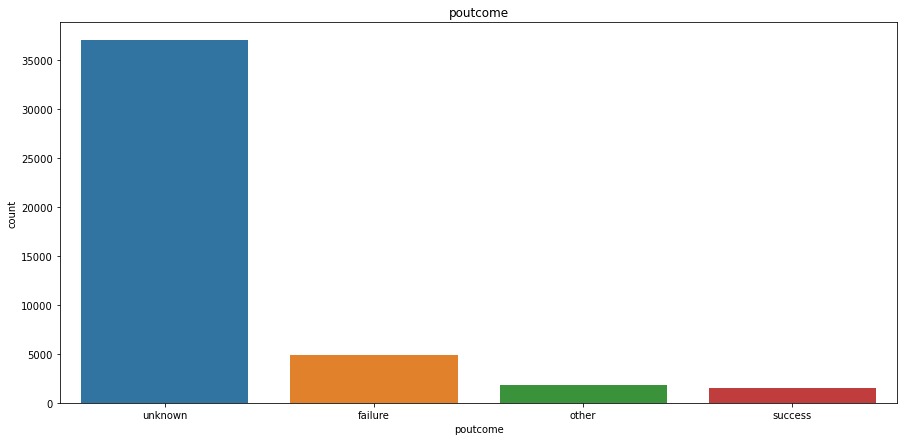

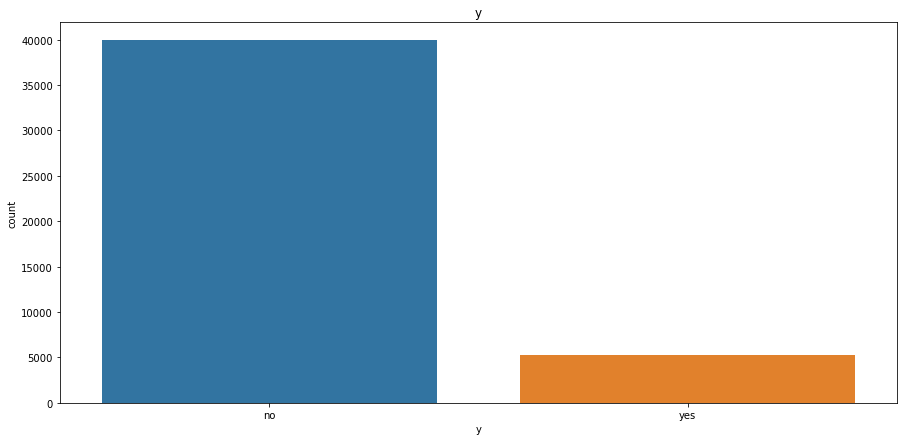

In [49]:
for column in category_features:
    plt.figure(figsize=(15,7))    
    sns.countplot(x=bank_data[column],data=bank_data)    
    plt.title(column)    

- Job: The audiences of these campaigns target mostly administrators, blue-collars, and technicians.
- Marital status: Most of them are married; married clients are twice as single people.
- Education: Most clients have university education level while illiterate people are very less.
- default/credit: Most people have no default stay on their credit file.
- housing: Most people have no housing loan.
- loan: Most people have no personal loan.
- contact: Common means of communication are cellular.
- month - May is the busy month and December is the least busy month (because of the holidays season).

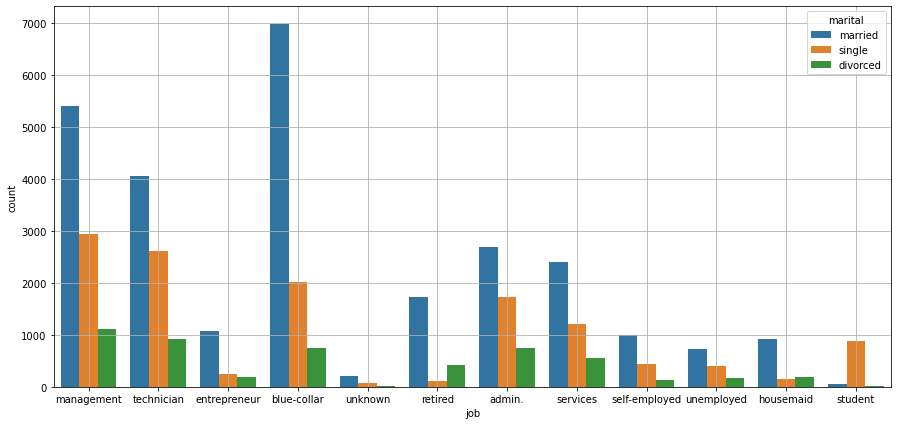

In [51]:
plt.figure(figsize=(15,7))
sns.countplot(x='job',hue='marital',data=bank_data)
plt.grid(True)
plt.show()

- There are high number of married persons and less numer of divorced persons from all job fields

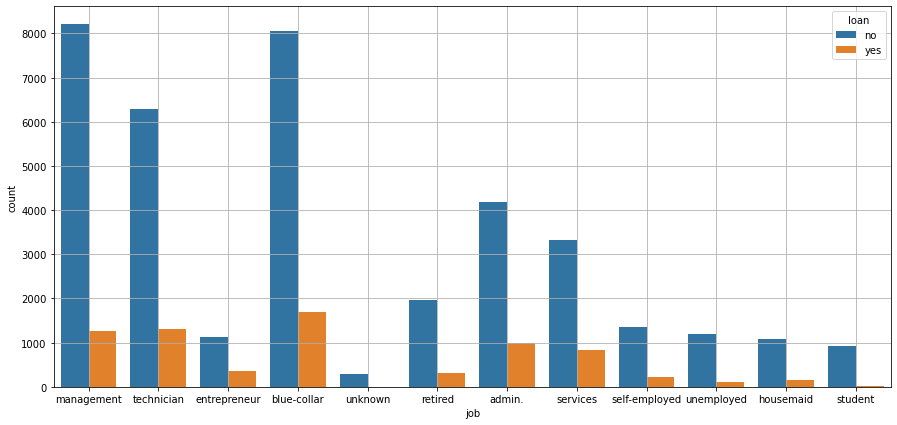

In [52]:
plt.figure(figsize=(15,7))
sns.countplot(x='job',hue='loan',data=bank_data)
plt.grid(True)
plt.show()

- Maximum number of the people did not take the loan.

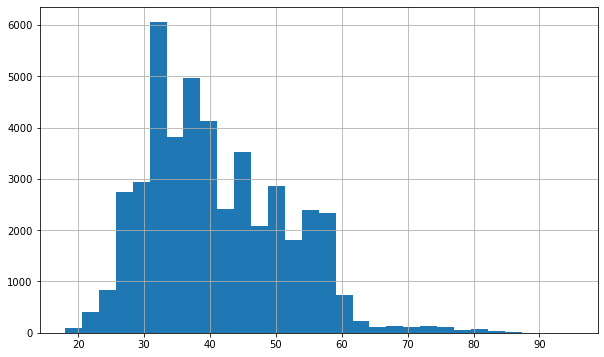

In [67]:
bank_data['age'].hist(bins=30,figsize=(10,6))
plt.show()


 - Most of the persons belongs to the 25 - 45 age group

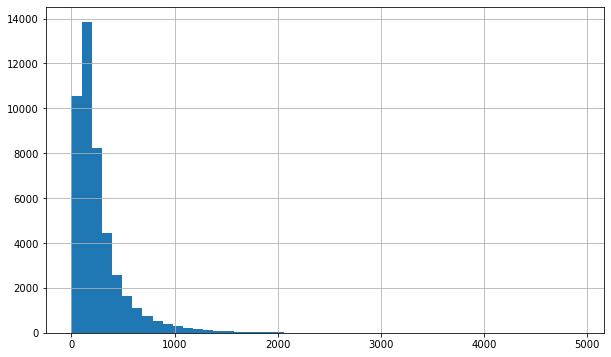

In [64]:
bank_data['duration'].hist(bins=50,figsize=(10,6))
plt.show()

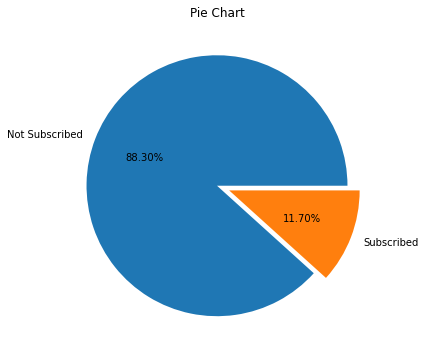

In [82]:
plt.figure(figsize=(10,6))
plt.pie(bank_data['y'].value_counts(),labels=['Not Subscribed','Subscribed'],explode=(0,0.1),autopct ='%1.2f%%')
plt.title('Pie Chart')
plt.show()

- 11.70% customers subscribed to the term deposit. Our classes are imbalanced where positive values (subscribed) are only 11.70%.

In [83]:
bank_data_new=pd.get_dummies(bank_data)
bank_data_new

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
45209,57,668,17,508,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


In [87]:
bank_data_new.shape

(45211, 43)

In [85]:
bank_data_new.drop(['job_admin.','marital_married','education_tertiary','default_no','housing_no','loan_no','contact_unknown',
                   'month_may','poutcome_unknown','y_no'],axis=1,inplace=True)

In [88]:
bank_data_new.shape

(45211, 43)

In [89]:
bank_data_new

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_single,education_primary,education_secondary,education_unknown,default_yes,housing_yes,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,33,2,5,76,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,47,1506,5,92,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
45209,57,668,17,508,4,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [90]:
X=bank_data_new.drop('y_yes',axis=1)
y=bank_data_new[['y_yes']]

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)

In [92]:
X_train.shape,y_train.shape

((36168, 42), (36168, 1))

In [93]:
X_test.shape,y_test.shape

((9043, 42), (9043, 1))

# Select From Model Technique

In [94]:
select_from_model = SelectFromModel(estimator = LogisticRegression(),max_features=None)
select_from_model.fit(X_train,y_train)

SelectFromModel(estimator=LogisticRegression())

In [95]:
select_from_model.get_support()

array([False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False,  True])

In [96]:
X_train.columns[select_from_model.get_support()]

Index(['campaign', 'job_blue-collar', 'job_retired', 'job_services',
       'marital_single', 'education_secondary', 'housing_yes', 'loan_yes',
       'contact_cellular', 'month_mar', 'month_oct', 'poutcome_failure',
       'poutcome_success'],
      dtype='object')

In [97]:
X_train_selected_features = select_from_model.transform(X_train)
X_test_selected_features  = select_from_model.transform(X_test)

In [98]:
X_train_selected_features.shape

(36168, 13)

In [99]:
X_test_selected_features.shape

(9043, 13)

In [109]:
def run_Logistic_Regression(X_train,y_train,X_test,y_test):
    lr_classifier = LogisticRegression(random_state=12)
    lr_classifier.fit(X_train,y_train) 

    y_pred = lr_classifier.predict(X_test)

    print('Accuracy Score  : ',round(accuracy_score(y_test,y_pred),4))
    print('Precision Score : ',round(precision_score(y_test,y_pred),4))
    print('Recall Score    : ',round(recall_score(y_test,y_pred),4))
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

- considering all features

In [111]:
all_features=run_Logistic_Regression(X_train,y_train,X_test,y_test) 
all_features

Accuracy Score  :  0.891
Precision Score :  0.5952
Recall Score    :  0.2127
Confusion Matrix:
 [[7832  153]
 [ 833  225]]


In [112]:
selected_fea_sfm=run_Logistic_Regression(X_train_selected_features,y_train,X_test_selected_features,y_test)
selected_fea_sfm

Accuracy Score  :  0.8934
Precision Score :  0.6556
Recall Score    :  0.1871
Confusion Matrix:
 [[7881  104]
 [ 860  198]]


# RFE - Recursive Feature Elimination

In [113]:
rfe_model = RFE(estimator = LogisticRegression(),n_features_to_select=None)
rfe_model.fit(X_train,y_train)

RFE(estimator=LogisticRegression())

In [114]:
rfe_model.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True])

In [115]:
X_train.columns[rfe_model.get_support()]

Index(['job_retired', 'job_student', 'job_unknown', 'marital_divorced',
       'marital_single', 'education_primary', 'housing_yes', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_success'],
      dtype='object')

In [118]:
X_train_rfe_selected = rfe_model.transform(X_train)
X_test_rfe_selected  = rfe_model.transform(X_test)

In [117]:
X_train_rfe_selected.shape

(36168, 21)

In [119]:
X_test_rfe_selected.shape

(9043, 21)

In [120]:
selected_fea_rfe=run_Logistic_Regression(X_train_rfe_selected,y_train,X_test_rfe_selected,y_test)
selected_fea_rfe

Accuracy Score  :  0.8933
Precision Score :  0.6716
Recall Score    :  0.172
Confusion Matrix:
 [[7896   89]
 [ 876  182]]


 - This accuracy score is not good as compare to Select From Model Technique.

# Hence we select best festures from Select From Model technique

In [122]:
selected_col=X_train.columns[select_from_model.get_support()]
print(selected_col.tolist())

['campaign', 'job_blue-collar', 'job_retired', 'job_services', 'marital_single', 'education_secondary', 'housing_yes', 'loan_yes', 'contact_cellular', 'month_mar', 'month_oct', 'poutcome_failure', 'poutcome_success']


In [123]:
selected_col_test=X_test.columns[select_from_model.get_support()]
print(selected_col_test.tolist())

['campaign', 'job_blue-collar', 'job_retired', 'job_services', 'marital_single', 'education_secondary', 'housing_yes', 'loan_yes', 'contact_cellular', 'month_mar', 'month_oct', 'poutcome_failure', 'poutcome_success']


In [124]:
X_train_final = X_train[selected_col.tolist()]
y_train_final = y_train['y_yes']
X_test_final = X_test[selected_col_test.tolist()]
y_test_final = y_test

X_test_final.head()

,campaign,job_blue-collar,job_retired,job_services,marital_single,education_secondary,housing_yes,loan_yes,contact_cellular,month_mar,month_oct,poutcome_failure,poutcome_success
28840,1,0,0,0,0,1,0,0,1,0,0,0,0
16017,1,1,0,0,0,1,1,0,0,0,0,0,0
29926,1,0,1,0,0,1,0,1,1,0,0,1,0
26323,1,1,0,0,0,1,0,0,1,0,0,0,0
34490,1,1,0,0,1,1,1,0,1,0,0,0,0


In [125]:
X_test_final.shape

(9043, 13)

# Model Training

In [126]:
logreg = LogisticRegression()
logreg.fit(X_train_final, y_train_final)

LogisticRegression()

# Model Testing \  Model Evaluation

In [127]:
y_pred_test = pd.DataFrame(logreg.predict(X_test_final))
y_pred_test.head()

,0
0,0
1,0
2,0
3,0
4,0


In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix = confusion_matrix(y_test_final,y_pred_test)
accuracy = accuracy_score(y_test_final,y_pred_test)
print('confusion_matrix :\n',confusion_matrix,'\nAccuracy of logistic regression classifier on test set:' ,accuracy)

confusion_matrix :
 [[7881  104]
 [ 860  198]] 
Accuracy of logistic regression classifier on test set: 0.8933982085591065


In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test_final,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7985
           1       0.66      0.19      0.29      1058

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



Text(0, 0.5, 'True Positive Rate')

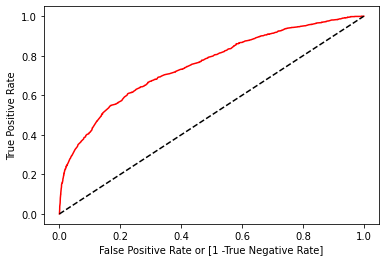

In [130]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test_final,logreg.predict_proba (X_test_final)[:,1])
auc = roc_auc_score(y_test_final,y_pred_test)

plt.plot(fpr,tpr,color = 'red',label = 'logistic model (area = %0.2f)'%auc)
plt.plot([0,1],[0, 1],'k--')
plt.xlabel('False Positive Rate or [1 -True Negative Rate]')
plt.ylabel('True Positive Rate')

In [131]:
auc

0.5870605684334876

# -----------------------------------------------------------------------------------------------------------